In [1]:
# import statements:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

## Visualizing the corrected mae dictionaries:

I did not want to spend too much time writing code in the .py files for this, so I have separated out the visualization of the results to this jupyter notebook. These notebooks are dynamic and there is more room to be creative while visualizing. 

In [2]:
multi_mae ={ "best 2" : {'knn': 12.153422078911726, 
                         'svm': 11.621569251379158, 
                         'lr': 11.824432787034647},
            "best 3" :{'knn': 11.64531841754976, 
                       'svm': 11.533935158612845, 
                       'lr': 11.903466777410435},
            "best 4": {'knn': 12.00231491341838, 
                       'svm': 11.872642334896177, 
                       'lr': 11.979335680862581},
            "best 5" : {'knn': 12.098059578394512, 
                        'svm': 11.913825553535348, 
                        'lr': 12.079776184709493},
            "best 6" : {'knn': 12.33206396313943, 
                        'svm': 12.121359510176545, 
                        'lr': 12.189493722935595},
            "best 7" : {'knn': 12.153674806601234, 
                        'svm': 12.10185040530819, 
                        'lr': 12.10239452819663},
            "best 8" : {'knn': 11.940492760115927, 
                        'svm': 12.028849721267958, 
                        'lr': 12.074071525980218},
            "all features" :{'knn': 11.910057517025267, 
                             'svm': 12.010369207397465, 
                             'lr': 12.135047642764388}
           }

uni_mae = {'$\Delta B_{SW}$': {'knn': 12.015624149158633, 
                      'svm': 11.724796556480682, 
                      'lr': 11.700509488990148}, 
           '$\Delta P_{SW}$': {'knn': 12.177157791127856, 
                      'svm': 12.021001891910561, 
                      'lr': 11.734781300665265}, 
           '$\Delta T_{SW}$': {'knn': 12.470639016727795, 
                      'svm': 12.055053332596497, 
                      'lr': 12.110965076176548},
           '$\Delta v_{SW}$': {'knn': 12.444789750583984, 
                      'svm': 12.06927968255157, 
                      'lr': 11.952104362744297}, 
           'CME speed': {'knn': 12.13396043385352, 
                     'svm': 11.930173933645925, 
                     'lr': 12.039105693392052}, 
           'CME half_width': {'knn': 12.115686828716788, 
                          'svm': 11.922134078513423, 
                          'lr': 12.073877726232386}, 
           'latitude': {'knn': 12.042020689277457, 
                   'svm': 12.239586321603223, 
                   'lr': 12.064688072441188}, 
           'longitude': {'knn': 12.44450015784103, 
                    'svm': 12.08853044014026, 
                    'lr': 12.082239566554538}, 
           '$\Delta n_{SW}$': {'knn': 12.142150416790045, 
                      'svm': 11.922129748669779, 
                      'lr': 12.074214677911037}}

## The mae plotting functions: The three important functions are as follows:

1) Ranked features: This fucntion makes a figure that ranks the features based on their uni-variate scores
2) multi_mae_plots: This fucntion makes the figure for the multivariate model results by using: best feature, 2 best features, ... , and so on
3) uni_mae_plots: This function makes the figure for the univariate scores for each of the three ML techniques

In [3]:
def ranked_univariate(uni_mae, save_path):
    """
    Takes a dictionary of MAE values and performs the following:
    1. Computes the average MAE for each feature across all models.
    2. Sorts the dictionary by the average MAE in descending order.
    3. Plots the sorted values as a horizontal bar chart.
    4. Saves the plot to the specified path.
    5. Returns the sorted list of parameter names (features).
    
    Parameters:
    uni_mae (dict): Dictionary where keys are feature names and values are their MAE for different models.
    save_path (str): Path where the plot should be saved.
    
    Returns:
    list: A list of parameter names sorted by their average MAE values in descending order.
    """
    
    # Compute the average MAE for each feature across models
    average_mae = {feature: sum(models.values()) / len(models) for feature, models in uni_mae.items()}

    # Sorting the dictionary by the average MAE in ascending order
    sorted_average_mae_asc = dict(sorted(average_mae.items(), key=lambda item: item[1], reverse=False))

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.barh(list(sorted_average_mae_asc.keys()), list(sorted_average_mae_asc.values()), color='blue', height=0.5)
    plt.xlabel('Average MAE')
    plt.title('Average MAE for Each Feature Based on Univariate ML Models')
    #plt.grid(True)

    # Save the plot to the specified path
    plt.savefig(save_path, dpi=500)

    # Close the plot to free memory
    plt.close()

    # Return the sorted list of parameter names
    return list(sorted_average_mae_asc.keys())

In [4]:
def multi_mae_plots(mae, save_path, enlil_mae=12.31):
    """
    This function plots the mean-absolute-errors of the multivariate model.
    
    Parameters:
    mae: dictionary
        mae is a dictionary whose key-value pairs are (string, dictionary). The keys represent the best sets of features
        for the ML models and the values are dictionaries of key-value pairs (string, float). The strings in
        this dictionary are names of the techniques used (e.g svm, knn, or lr). The values in this case are 
        the reduced MAEs.
        
    save_path: string
        This is the path where the resulting figure will be stored.
        
    enlil_mae:
        This parameter is the ENLIL MAE which I have to show on the plot for comparison with how much the 
        error was reduced. 
        
    Returns:
    None
    """
    
    # Making the plot data dictionary:
    plot_data = {'KNN': [], 'LR': [], 'SVM': []}
    for feature_set in list(mae.keys()):
        for method in plot_data.keys():
            method_lower = method.lower()  # Convert method to lowercase to match keys in the dictionary
            plot_data[method].append(mae[feature_set][method_lower])
    
    # Define bar parameters
    colors = {'KNN': 'red', 'LR': 'green', 'SVM': 'blue'}  # Colors for the models
    bar_width = 0.2
    index = np.arange(len(list(mae.keys())))  # Match index length with the number of feature sets
    
    # Set the figure size to allow for better spacing
    plt.figure(figsize=(10, 6))  # Adjust figure size
    
    # Plot feature sets and data
    for i, ml_technique in enumerate(plot_data.keys()):
        plt.bar(index + i * bar_width, plot_data[ml_technique], color=colors[ml_technique], width=bar_width, label=ml_technique)

    feature_labels = list(mae.keys())  # Create feature set labels
    plt.xticks(index + bar_width, feature_labels, rotation=45, ha='right', fontsize=12)

    plt.xlabel('Feature Set', fontsize=14)
    plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)
    plt.title('MAE vs Selected Feature Sets (Multivariate)', fontsize=16)
    plt.axhline(y=enlil_mae, color='black', linestyle='--', linewidth=2, label='ENLIL MAE')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, markerscale=1.5, labelspacing=0.8)
    plt.grid(axis='y')
    plt.ylim(0, 14)  # Adjust y-axis limit to 14
    
    # Use tight layout to ensure the plot fits well within the figure
    plt.tight_layout()

    # Save the figure
    plt.savefig(save_path, dpi=500, bbox_inches='tight')  # bbox_inches ensures all elements are saved
    plt.show()

    return None

In [5]:
def uni_mae_plots(mae, save_path, enlil_mae=12.31):
    """
    This function plots the mean-absolute-errors of the univariate model.
    
    Parameters:
    mae: dictionary
        mae is a dictionary whose key-value pairs are (string, dictionary). The keys represent the features
        of the ml models and the values are dictionaries of key-value pairs (string, float). The strings in
        this dictionary are names of the techniques used (e.g svm, knn, or lr). The values in this case are 
        the reduced MAEs.
        
    save_path: string
        This is the path where the resulting figure will be stored.
        
    enlil_mae:
        This parameter is the enlil mae which I have to show on the plot, for comparison about how much the 
        error was reduced. 
        
    Returns:
    None
    """
    
    # Making the plot data dictionary:
    plot_data = {'KNN': [], 'LR': [], 'SVM': []}
    for feature in list(mae.keys()):
        for method in plot_data.keys():
            method_lower = method.lower()  # Convert method to lowercase to match keys in the dictionary
            plot_data[method].append(mae[feature][method_lower])
    
    # Define bar parameters
    colors = {'KNN': 'red', 'LR': 'green', 'SVM': 'blue'}  # Placeholder colors, replace with your own
    bar_width = 0.2
    index = np.arange(len(list(mae.keys())))  # Match index length with the number of features
    
    # Set the figure size to allow for better spacing
    plt.figure(figsize=(10, 6))  # Adjust figure size
    
    # Plot features and data
    for i, ml_technique in enumerate(plot_data.keys()):
        plt.bar(index + i * bar_width, plot_data[ml_technique], color=colors[ml_technique], width=bar_width, label=ml_technique)

    feature_labels = list(mae.keys())  # Create feature labels
    plt.xticks(index + bar_width, feature_labels, rotation=45, ha='right', fontsize=12)

    plt.xlabel('Feature', fontsize=14)
    plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)
    plt.title('MAE vs Selected Features', fontsize=16)
    plt.axhline(y=enlil_mae, color='black', linestyle='--', linewidth=2, label='ENLIL MAE')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, markerscale=1.5, labelspacing=0.8)
    plt.grid(axis='y')
    plt.ylim(0, 14)  # Adjust y-axis limit to 14
    
    # Use tight layout to ensure the plot fits well within the figure
    plt.tight_layout()

    # Save the figure
    plt.savefig(save_path, dpi=500, bbox_inches='tight')  # bbox_inches ensures all elements are saved
    plt.show()

    return None

## Call the functions to save the images

In [6]:
# calling the ranked univariate function:
ranked_univariate(uni_mae, "figures/ranked_features.png")

['$\\Delta B_{SW}$',
 '$\\Delta P_{SW}$',
 'CME speed',
 'CME half_width',
 '$\\Delta n_{SW}$',
 'latitude',
 '$\\Delta v_{SW}$',
 'longitude',
 '$\\Delta T_{SW}$']

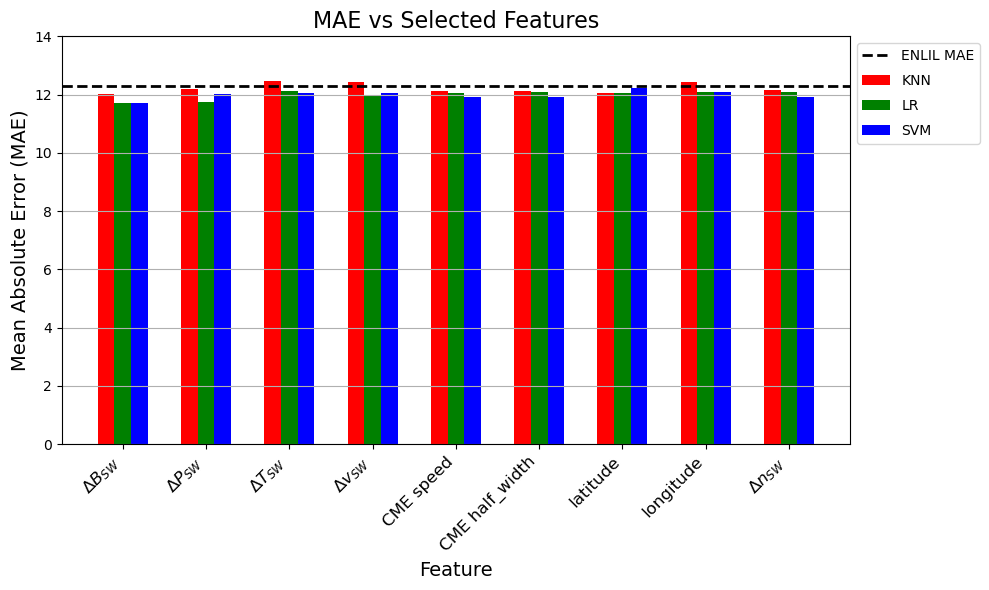

In [48]:
# calling uni results:
uni_mae_plots(uni_mae, "figures/uni_mae.png")

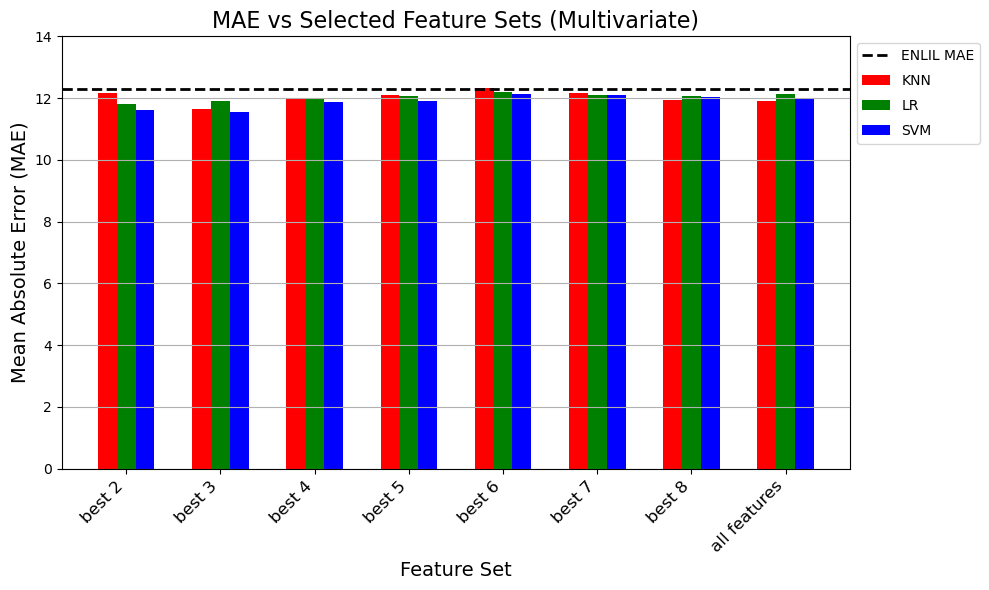

In [49]:
# calling the multivariate resutls:
multi_mae_plots(multi_mae, "figures/multi_mae.png")